In [1]:
# Installing TensorFlow: The first line installs the TensorFlow library using the pip command.

In [2]:
!pip install tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
# Importing Libraries: The necessary libraries are imported, including TensorFlow and its components.

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [5]:
# Loading and Preprocessing Data: The MNIST dataset is loaded and preprocessed. The pixel values of the images are normalized to be between 0 and 1, and the labels are one-hot encoded.

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 0s 0us/step


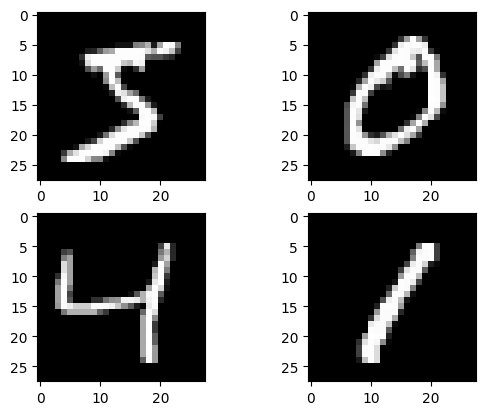

In [7]:
# Plot the images
plt.subplot(221)
plt.imshow(train_images[0],cmap=plt.get_cmap("gray"))
plt.subplot(222)
plt.imshow(train_images[1],cmap=plt.get_cmap("gray"))
plt.subplot(223)
plt.imshow(train_images[2],cmap=plt.get_cmap("gray"))
plt.subplot(224)
plt.imshow(train_images[3],cmap=plt.get_cmap("gray"))

In [8]:
# Building the CNN Model: A simple CNN model is constructed using the Sequential API in Keras. It consists of convolutional layers, max-pooling layers, and fully connected layers.

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [10]:
# Compiling the Model: The model is compiled with an optimizer, loss function, and evaluation metric.

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
# Training the Model: The model is trained on the training data for a specified number of epochs.

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
train_acc = model.evaluate(train_images, train_labels)

Epoch 1/5
938/938 [==============================] - 68s 70ms/step - loss: 0.1934 - accuracy: 0.9401 - val_loss: 0.0592 - val_accuracy: 0.9810
Epoch 2/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0452 - val_accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0369 - accuracy: 0.9880 - val_loss: 0.0338 - val_accuracy: 0.9870
Epoch 4/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0271 - val_accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0166 - accuracy: 0.9949


In [16]:
train_acc = model.evaluate(train_images, train_labels)
train_acc


1875/1875 [==============================] - 14s 8ms/step - loss: 0.0166 - accuracy: 0.9949


[0.01659409888088703, 0.9949166774749756]

In [14]:
# Evaluating the Model: The trained model is evaluated on the test set, and the test accuracy is printed.

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 [==============================] - 2s 7ms/step - loss: 0.0302 - accuracy: 0.9902
Test accuracy: 99.02%
